<a href="https://colab.research.google.com/github/Suriyaprabhu14/MyProject/blob/main/NM_FINAL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:

import pandas as pd


df = pd.read_csv(r'/content/spam.csv',encoding='ISO-8859-1')

df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)



df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [2]:
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

In [3]:
import matplotlib.pyplot as ab
import numpy as np
labels = ['ham', 'spam']
counts = [4825, 747]
ypos = np.arange(len(labels)) #converting text labels to numberic value, 0 and 1
ypos

array([0, 1])

<BarContainer object of 2 artists>

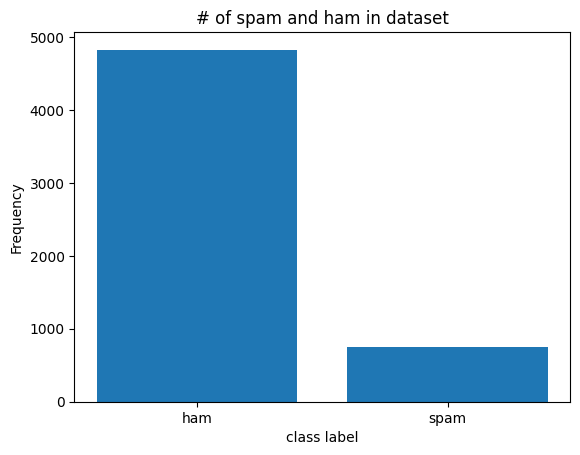

In [4]:
ab.xticks(ypos, labels)
ab.xlabel("class label")
ab.ylabel("Frequency")
ab.title("# of spam and ham in dataset")
ab.bar(ypos, counts)

In [5]:
#separate both classes
df_ham = df[df.class_label=='ham']
df_spam = df[df.class_label=='spam']

#convert to list

ham_list=df_ham['message'].tolist()
spam_list= df_spam['message'].tolist()


filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()

filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()

In [8]:
import os
from wordcloud import WordCloud
from PIL import Image
comment_mask = np.array(Image.open("comment.png"))


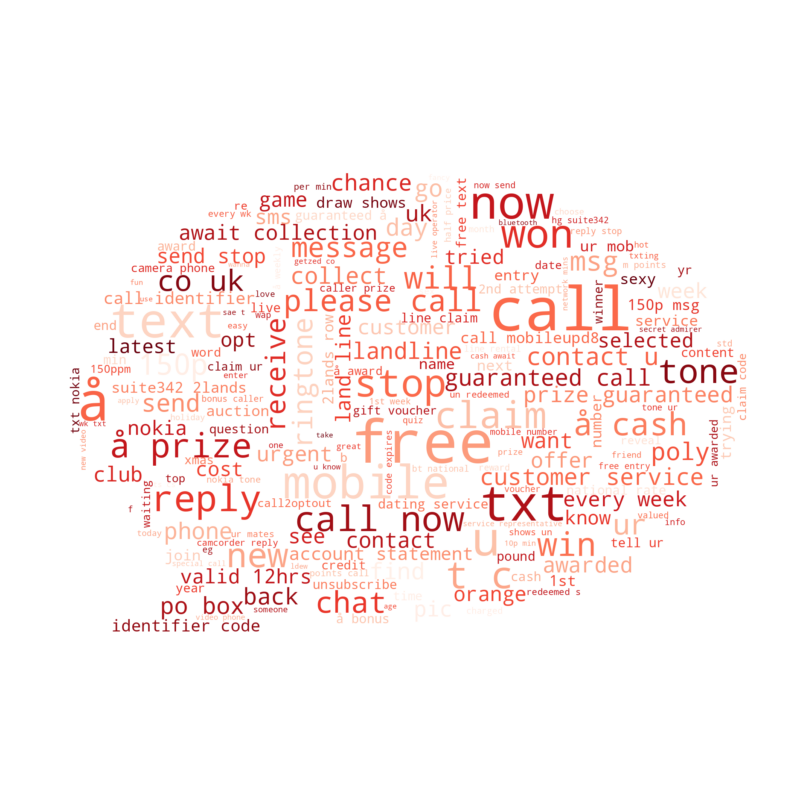

In [9]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Reds").generate(filtered_spam)

# Display the generated image

ab.figure(figsize=[20,10])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")

ab.margins(x=0, y=0)

ab.show()

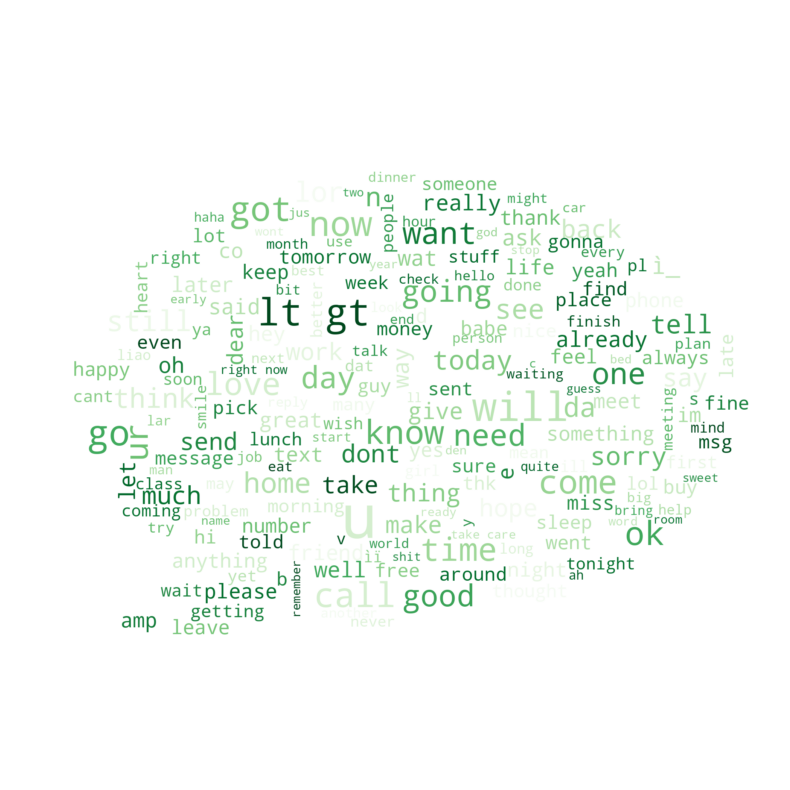

In [10]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Greens").generate(filtered_ham)

# Display the generated image

ab.figure(figsize=[20,10])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")

ab.margins(x=0, y=0)

ab.show()

In [11]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)

In [12]:
from sklearn.model_selection import train_test_split
# 30% test, 70% train split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 0)

print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))
type(x_train)

rows in test set: (1672,)
rows in train set: (3900,)


pandas.core.series.Series

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize email text into tfidf matrix
# TfidfVectorizer converts collection of raw documents to a matrix of TF-IDF features.
# It's equivalent to CountVectorizer followed by TfidfTransformer.
list = x_train.tolist()
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(list) #gives tf idf vector
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vecto

InvalidParameterError: ignored

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# train a classifier
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

In [ ]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

In [ ]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)

print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )

score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

In [ ]:
#heatmap for confusion matrix
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds')

In [14]:
list = x_train.tolist()
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents = ascii) #initialize countVectorizer.
word_count_vector=cv.fit_transform(list) #get the document-term matrix.
print(word_count_vector.shape) #see the rows and columns of this matrix

(3900, 7127)


In [ ]:
x_test_vector = cv.transform(x_test)

In [ ]:


# train a classifier
classifier = MultinomialNB()
classifier.fit(word_count_vector, y_train)

In [ ]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(x_test_vector, y_test) * 100))

In [15]:
labels = classifier.predict(x_test_vector)



actual = y_test
predicted = labels
results = confusion_matrix(actual, predicted)

print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

NameError: ignored

In [22]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Greens')

NameError: ignored

In [21]:
#Implementing cross validation on both the models

#THIS CELL USES CROSS VALIDATION FOR COUNT VECTORIZER

#%pip install scikit-learn

#%conda upgrade scikit-learn


from sklearn.model_selection import cross_val_score

X=df["message"].tolist()
Y=df["class_label"].tolist()
df

classifier = MultinomialNB()

cv = CountVectorizer(strip_accents = ascii) #initialize countVectorizer.
word_count_vector=cv.fit_transform(X) #get the document-term matrix.
#print(word_count_vector.shape) #see the rows and columns of this matrix

scores=cross_val_score(classifier,word_count_vector,Y,cv=10,scoring='accuracy')

print(scores)

print(scores.mean())


NameError: ignored

In [20]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(classifier,word_count_vector, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)
conf_mat

NameError: ignored

In [16]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='terrain')

NameError: ignored

In [19]:
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(X) #gives tf idf vector
#features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector

classifier = MultinomialNB()

scores=cross_val_score(classifier,features_train_transformed,Y,cv=10,scoring='accuracy')

print(scores)

print(scores.mean())


NameError: ignored

In [18]:
y_pred = cross_val_predict(classifier,features_train_transformed, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)
conf_mat

NameError: ignored

In [17]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='twilight_shifted_r')

NameError: ignored